In [1]:
import os
import jax
import jax.numpy as jnp
import numpy as np


import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [2]:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)
jax.default_backend()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


'cpu'

In [3]:
key = jax.random.PRNGKey(0)

In [7]:
def generate_mnist_dataset(M_train, M_test, size=12,n_layers=8,n_qubits=6):
    """Data generation procedure for 'linearly separable'.

    Args:
        n_samples (int): number of samples to generate
        n_features (int): dimension of the data samples
        margin (float): width between hyperplane and closest samples
    """

    # 载入MNIST数据集
    trainset = datasets.CIFAR10(root='~/Datasets', train=True, download=True, transform=None)
    testset = datasets.CIFAR10(root='~/Datasets', train=False, download=True, transform=None)
    
    train_idx = jnp.where((jnp.array(trainset.targets) == 0) | (jnp.array(trainset.targets) == 1))[0][:M_train]
    test_idx = jnp.where((jnp.array(testset.targets) == 0) | (jnp.array(testset.targets) == 1))[0][:M_test]
    
    x_train = trainset.data[train_idx.tolist()]
    y_train = jnp.array(trainset.targets)[train_idx]
    x_test = testset.data[test_idx.tolist()]
    y_test = jnp.array(testset.targets)[test_idx]

    # 在获取数据后进行转换
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Grayscale(num_output_channels=1),  # 转换为灰度图
        transforms.Resize((size, size), interpolation=transforms.InterpolationMode.BILINEAR),  # 调整大小
        transforms.ToTensor(),
    ])
    
    # 对数据进行批量转换
    x_train = jnp.array([transform(img).numpy().reshape(size, size) for img in x_train]).reshape(-1, n_layers, n_qubits, 3)
    x_test = jnp.array([transform(img).numpy().reshape(size, size) for img in x_test]).reshape(-1, n_layers, n_qubits, 3)

    return x_train, y_train, x_test, y_test


In [8]:
M_train = 600
M_test = 1000
size = 12

Training set shape: (600, 8, 6, 3)
Training labels shape: (600,)
Test set shape: (1000, 8, 6, 3)
Test labels shape: (1000,)


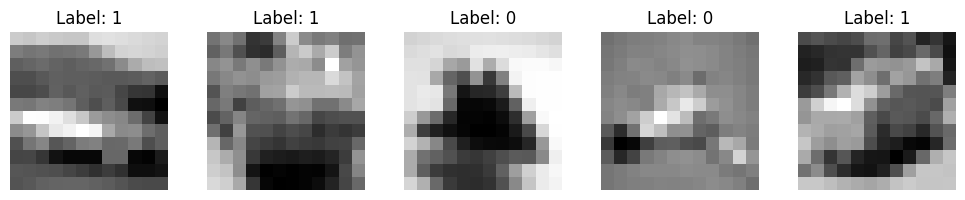

In [9]:
x_train, y_train, x_test, y_test = generate_mnist_dataset(M_train, M_test, size)

print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Display sample images
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i].reshape(12,12), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()



In [10]:
def save_dataset(n_qubits,n_layers,M_train,M_test,size,data_type,datasets_path):
    os.makedirs(f"{datasets_path}/{data_type}", exist_ok=True)
    x_train,y_train,x_test,y_test = generate_mnist_dataset(M_train,M_test,size,n_layers,n_qubits)
    x_train = x_train.reshape(M_train,n_layers,n_qubits,3)
    x_test = x_test.reshape(M_test,n_layers,n_qubits,3)
    jnp.save(f"{datasets_path}/{data_type}/x_train_qubit_{n_qubits}_layer_{n_layers}_sample_{M_train}.npy",x_train)
    jnp.save(f"{datasets_path}/{data_type}/y_train_qubit_{n_qubits}_layer_{n_layers}_sample_{M_train}.npy",y_train)
    jnp.save(f"{datasets_path}/{data_type}/x_test_qubit_{n_qubits}_layer_{n_layers}_sample_{M_test}.npy",x_test)
    jnp.save(f"{datasets_path}/{data_type}/y_test_qubit_{n_qubits}_layer_{n_layers}_sample_{M_test}.npy",y_test)
    

In [11]:
n_qubits = 8
n_layers = 6
M_train = 600
M_test = 1000
size = 12
data_type = 'cifar10_gray'
datasets_path = '../../datasets'
save_dataset(n_qubits=n_qubits,n_layers=n_layers,M_train=M_train,M_test=M_test,size=size,data_type=data_type,datasets_path=datasets_path)
